# Lab3

1.Uruchomić:
naive_multiplication(A,B),
better_multiplication(A,B)
mnożenie BLAS w Julii (A*B)
dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

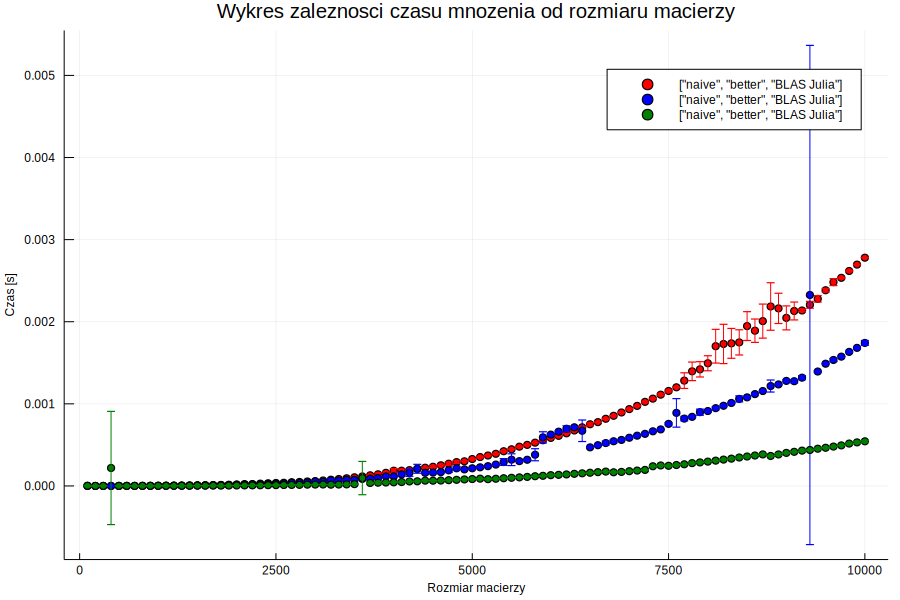

In [1]:
using DataFrames, Base, Statistics, Plots

function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function time_fun()
a=Float64[]
    for i=1:3
        for j=1:100
            A=rand(1:1000,j,j)
            B=rand(1:1000,j,j)
            for k=1:10
                if i==1
                    push!(a, @elapsed naive_multiplication(A,B))
                elseif i==2
                    push!(a, @elapsed better_multiplication(A,B))
                else
                    push!(a, @elapsed A*B)
                end
            end
        end
    end
return a
end

df=DataFrame(size=repeat(100:100:10000, inner=10, outer=3), fun=repeat(1:3, inner=1000), time=time_fun())

dataGrouped=by(df, [:size, :fun], timeMean = :time => mean, std = :time => std)

scatter(dataGrouped[:size], dataGrouped[:timeMean], group=dataGrouped[:fun],
     colour=[:red :blue :green] , yerr=dataGrouped[:std],
     label=["naive","better","BLAS Julia"],
     size=(900,600),
     title="Wykres zaleznosci czasu mnozenia od rozmiaru macierzy",
     xaxis=("Rozmiar macierzy", font(8)), yaxis=("Czas [s]", font(8)))


2.Napisać w języku C:

- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 

Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1).

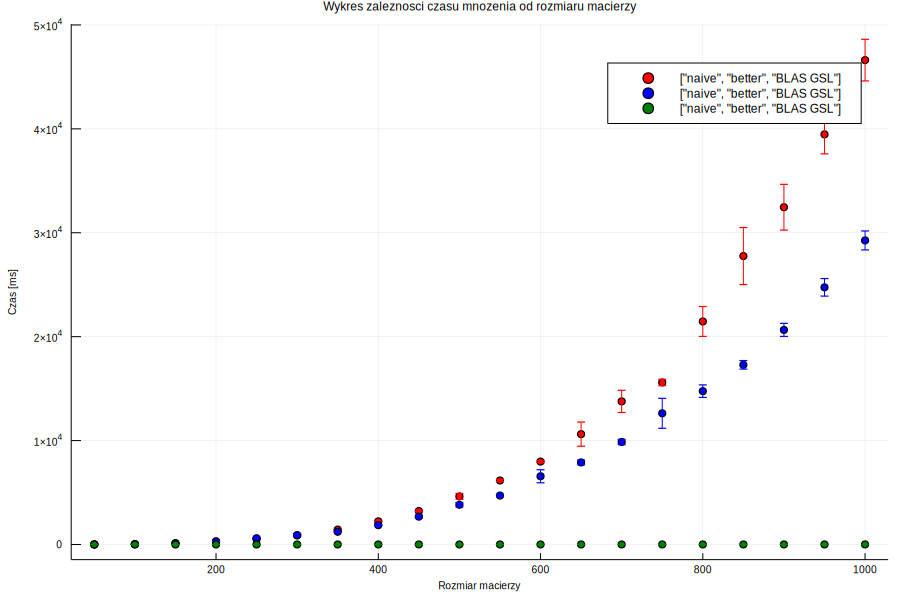

In [2]:
using Statistics, DataFrames,CSV, Plots
input="resultsLab3.csv"
mydata=CSV.read(input, delim=";")
dataGrouped2=by(mydata, [:size, :fun], timeMean = :time => mean, std = :time => std)
scatter(dataGrouped2[:size], dataGrouped2[:timeMean], group=dataGrouped2[:fun], colour=[:red :blue :green], 
    label=["naive","better","BLAS GSL"],
    yerr=dataGrouped2[:std], size=(900,600), titlefontsize=8,
    title="Wykres zaleznosci czasu mnozenia od rozmiaru macierzy",
    xaxis=("Rozmiar macierzy", font(7)), yaxis=("Czas [ms]", font(7)))

3.Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

In [5]:
using Polynomials, Statistics, DataFrames,CSV, Plots
fit_n1=polyfit(dataGrouped[1:100, :].size ,dataGrouped[1:100, :].timeMean,3)
fit_b1=polyfit(dataGrouped[101:200, :].size ,dataGrouped[101:200, :].timeMean,3)
fit_l1=polyfit(dataGrouped[201:300, :].size ,dataGrouped[201:300, :].timeMean,3)
fit_n2=polyfit(dataGrouped2[1:20, :].size ,dataGrouped2[1:20, :].timeMean,3)
fit_b2=polyfit(dataGrouped2[21:40, :].size ,dataGrouped2[21:40, :].timeMean,3)
fit_l2=polyfit(dataGrouped2[41:60, :].size ,dataGrouped2[41:60, :].timeMean,3)

Poly(-0.028443013415891276 + 0.0011283228951243331*x + 1.8286071491213865e-6*x^2 + 2.0499435055902722e-9*x^3)

In [6]:
xd=0:0.1:10000
plot(xd,polyval(fit_n1,xd), label="aproksymacja naive", linewidth=2, colour=:red)
plot!(xd,polyval(fit_b1,xd), label="aproksymacja better", linewidth=2, colour=:blue)
plot!(xd,polyval(fit_l1,xd), label="aproksymacja julia BLAS", linewidth=2, colour=:green)
scatter!(dataGrouped[:size], dataGrouped[:timeMean], group=dataGrouped[:fun], yerr=dataGrouped[:std],
     markersize=1, colour=[:red :blue :green],
     label=["naive","better","BLAS Julia"],
     size=(900,600),
     title="Wykres zaleznosci czasu mnozenia od rozmiaru macierzy z aproksymacja w Julii",
     xaxis=("Rozmiar macierzy", font(8)), yaxis=("Czas [s]", font(8)))

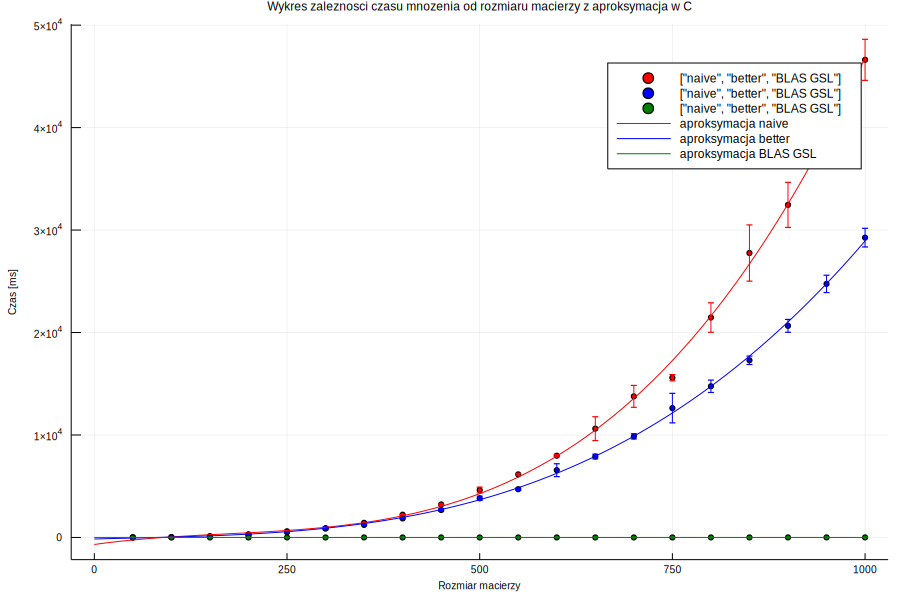

In [7]:
xd=0:0.1:1000
scatter(dataGrouped2[:size], dataGrouped2[:timeMean], group=dataGrouped2[:fun], 
    markersize=3, colour=[:red :blue :green], 
    label=["naive","better","BLAS GSL"],
    yerr=dataGrouped2[:std], size=(900,600), titlefontsize=8,
    title="Wykres zaleznosci czasu mnozenia od rozmiaru macierzy z aproksymacja w C",
    xaxis=("Rozmiar macierzy", font(7)), yaxis=("Czas [ms]", font(7)))
plot!(xd,polyval(fit_n2,xd), label="aproksymacja naive", linewidth=1, colour=:red)
plot!(xd,polyval(fit_b2,xd), label="aproksymacja better", linewidth=1, colour=:blue)
plot!(xd,polyval(fit_l2,xd), label="aproksymacja BLAS GSL", linewidth=1, colour=:green)